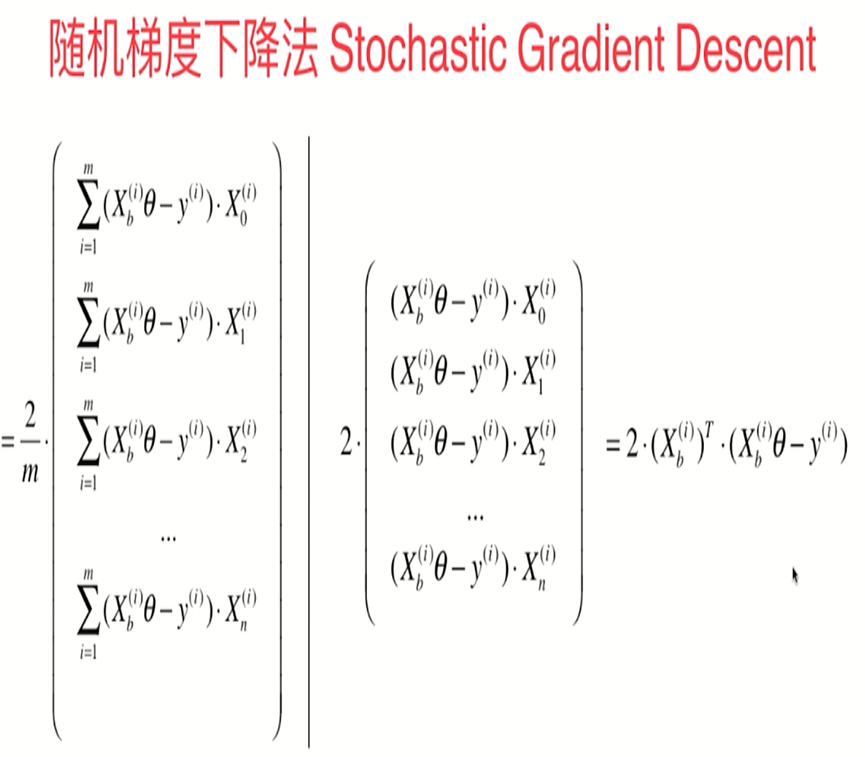

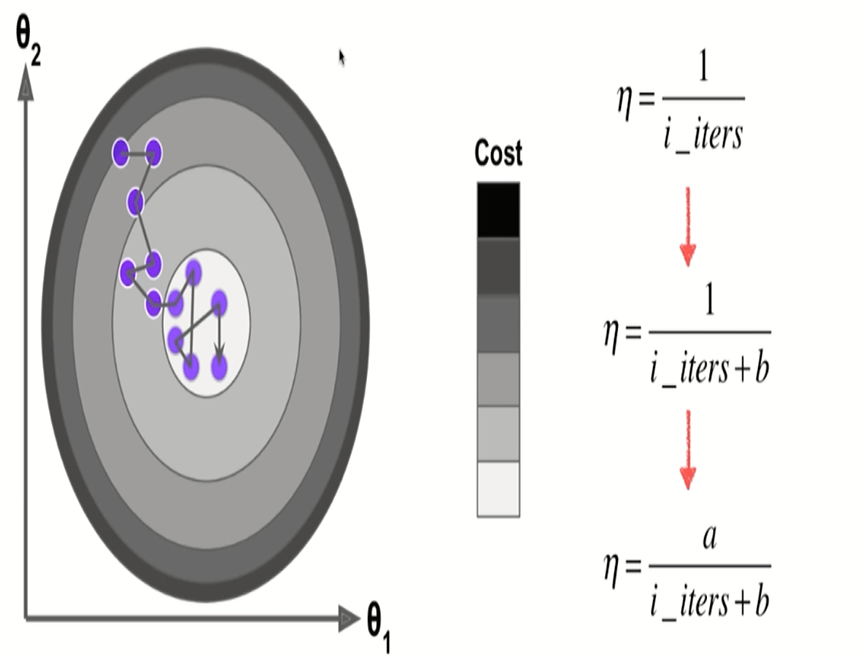

## 批量梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4.*x + 3. +np.random.normal(0,3,size=m)

In [3]:
def J(theta,x_b,y):
    try:
        return np.sum((y-x_b.dot(theta))**2)/len(y)
    except:
        return float('inf')
def dJ(theta,x_b,y):
    return x_b.T.dot(x_b.dot(theta)-y)*2./len(y)
def gradient_descent(x_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-10):
    theta=initial_theta
    cur_iter=0
    while cur_iter < n_iters:
        gradient=dJ(theta,x_b,y)
        last_theta=theta
        theta=theta-eta*gradient
        if(abs(J(theta,x_b,y)-J(last_theta,x_b,y))<epsilon):
            break
        cur_iter+=1
    return theta

In [4]:
%%time
X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

Wall time: 2.88 s


In [5]:
theta

array([3.00783985, 4.00494781])

## 随机梯度下降法

In [6]:
def dJ_sgd(theta,x_b_i,y_i):
    return x_b_i.T.dot(x_b_i.dot(theta)-y_i)*2.

In [7]:
def sgd(X_b, y, initial_theta, n_iters):
    
    t0 = 5
    t1= 50
    
    def learning_rate(t):
        return t0 / (t + t1)

    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    
    return theta

In [8]:
%%time
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)

Wall time: 372 ms


In [9]:
theta

array([2.98207375, 4.01836139])